In [1]:
import os
os.getcwd()

'C:\\Users\\chint'

In [2]:
import pandas as pd
import seaborn as sns

In [7]:
df = pd.read_csv('Admission_Predict.csv')

In [8]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [9]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
from sklearn.preprocessing import Binarizer

In [11]:
bi = Binarizer(threshold = 0.75)

In [12]:
df['Chance of Admit '] = bi.fit_transform(df[['Chance of Admit ']])

In [13]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1.0
396,397,325,107,3,3.0,3.5,9.11,1,1.0
397,398,330,116,4,5.0,4.5,9.45,1,1.0
398,399,312,103,3,3.5,4.0,8.78,0,0.0


In [15]:
x = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']
y = y.astype('int')

In [16]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [17]:
y

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int32

<Axes: xlabel='Chance of Admit ', ylabel='count'>

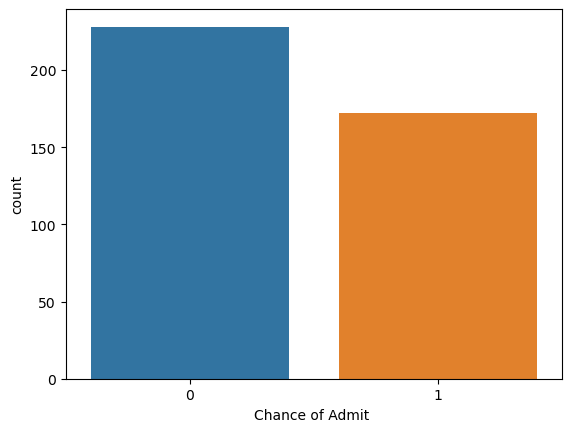

In [18]:
sns.countplot(x=y)

In [21]:
y.value_counts()

Chance of Admit 
0    228
1    172
Name: count, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.25)

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
classifier = DecisionTreeClassifier(random_state=0)

In [28]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
y_pred = classifier.predict(x_test)

In [31]:
result = pd.DataFrame({'actual' : y_test,
                      'predicted' : y_pred})

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score_score

In [36]:
from sklearn.metrics import classification_report

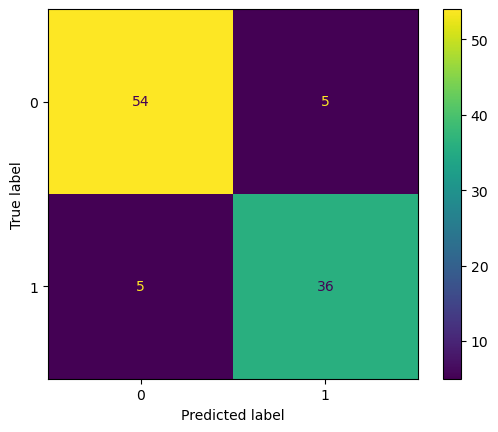

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [39]:
accuracy_score (y_test, y_pred)

0.9

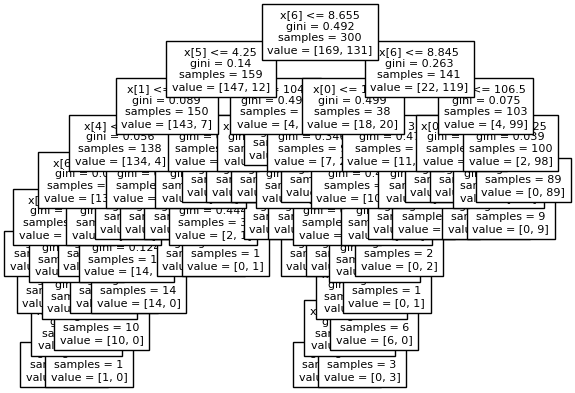

In [44]:
from sklearn.tree import plot_tree
plot_tree(classifier, fontsize =8,);